In [1]:
from distutils.command.build import build

from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

Failed to register object schema 'example_object2 with metaschema {'type': 'object', 'properties': {'type': {'type': 'string'}, 'boundary_conditions': {'type': 'object'}, 'contained_object_types': {'type': 'array'}, 'attributes': {'type': 'object'}, 'inherits_from': {'type': 'array'}}, 'required': ['type', 'attributes']}': 'schema/object/example_object.json' is not of type 'array'
Failed to register process schema 'example_process': 'update' is a required property
Failed to register schema 'cell_sorting' from file 'cell_sorting.json': 'type'
Failed to register schema 'cellular_potts' from file 'cellular_potts.json': 'type'


In [2]:
demo_model = ModelBuilder(model_name='demo')
demo_model.add_object(name='universe', obj_type='Universe', contained_objects=['cell field'])
demo_model.add_object(name='cell field', obj_type='CellField', contained_objects=['cell'])
demo_model.add_object(name='cell', obj_type='Cell')
demo_model.add_process(name='growth', proc_type='Growth', participating_objects='cell')
demo_model.add_process(name='volume exclusion', proc_type='VolumeExclusion', participating_objects='cell field')
demo_model

ModelBuilder({ 'id': 'model_000005',
  'name': 'demo',
  'objects': { 'cell': { 'attributes': {},
                         'boundary_conditions': {},
                         'type': 'Cell'},
               'cell field': { 'attributes': {},
                               'boundary_conditions': {},
                               'type': 'CellField'},
               'universe': { 'attributes': {},
                             'boundary_conditions': {},
                             'type': 'Universe'}},
  'processes': { 'growth': { 'attributes': {},
                             'participating_objects': ['cell'],
                             'type': 'Growth'},
                 'volume exclusion': { 'attributes': {},
                                       'participating_objects': ['cell field'],
                                       'type': 'VolumeExclusion'}},
  'structure': {'cell field': ['cell'], 'universe': ['cell field']}})

In [3]:
demo_model.verify()
demo_model.save(filename='demo_model.json')

Schema Universe is valid.
Schema CellField is valid.
Schema Cell is valid.
Schema Growth: is invalid: 
 'update' is a required property
Schema VolumeExclusion: is invalid: 
 'update' is a required property
Invalid containment: Universe not found in allowed containments
Schema Universe is valid.
Schema CellField is valid.
Schema Cell is valid.
Schema Growth: is invalid: 
 'update' is a required property
Schema VolumeExclusion: is invalid: 
 'update' is a required property
Invalid containment: Universe not found in allowed containments
Model saved to models/demo_model.json


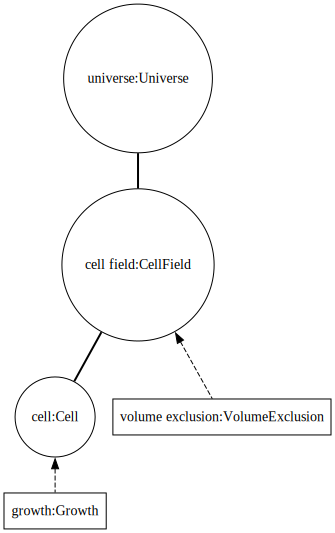

In [4]:
demo_model.graph()